In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
# Generate a toy example using sklearn
X, y = make_blobs(n_samples=1000, centers=20, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 10))

print(X.shape)
print(y)

Y = np.expand_dims(y, axis=-1)
data = np.concatenate([X, Y], axis=-1)

data = pd.DataFrame(data, columns=['x','y', 'label'])

(1000, 2)
['r' 'r' 'b' 'r' 'b' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'r' 'r' 'r'
 'b' 'b' 'r' 'b' 'r' 'r' 'r' 'r' 'r' 'r' 'b' 'r' 'b' 'b' 'b' 'b' 'b' 'r'
 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'b' 'b' 'r' 'r' 'r' 'b' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'b' 'r' 'r' 'r' 'b' 'b' 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'r' 'b'
 'r' 'b' 'r' 'b' 'r' 'r' 'r' 'b' 'r' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'b'
 'b' 'r' 'b' 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'r' 'b' 'b' 'r' 'r' 'b' 'r' 'r'
 'b' 'r' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'r' 'b'
 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'b' 'r' 'b' 'b' 'r' 'r' 'r' 'r' 'r' 'r' 'b'
 'r' 'r' 'b' 'r' 'b' 'r' 'r' 'b' 'r' 'r' 'b' 'r' 'b' 'r' 'r' 'b' 'b' 'r'
 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'b' 'r' 'r' 'r' 'r' 'b' 'b' 'b' 'r' 'b'
 'b' 'r' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'r' 'r'
 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'b'
 'r' 'b' 'b' 'b' 'b' 'r' 'r' 'b' 'b' 'b' 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'r'
 'r' 'r' 'b' 'r' 'r' 'r' 'r' 'b' 'b' 'r' 

In [3]:
data.head(10)

,x,y,label
0,-6.45255646603369,-8.763582588004452,r
1,0.2898214122160939,0.14677196152391225,r
2,-5.184122930268115,-1.2534702518970096,b
3,-4.713888470809617,3.674404625516476,r
4,4.515582960628491,-2.881380327190773,b
5,-0.5765894463501406,4.615896711742838,r
6,0.4202627550782958,-7.090973475638641,r
7,4.980083613605647,-1.4225720752999897,r
8,4.680253783136185,-1.2582081273528194,r
9,-2.16028169667958,2.751322646270088,r


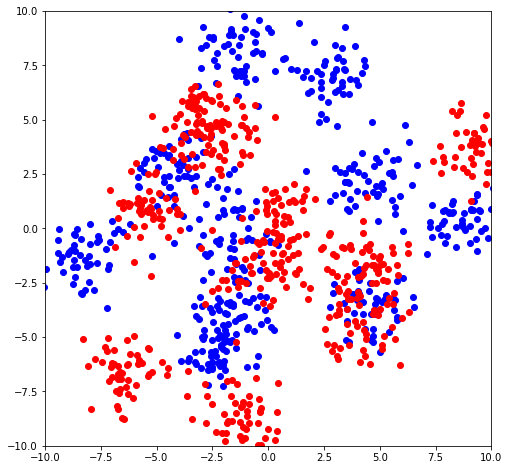

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [5]:
from matplotlib import pyplot as plt
import numpy as np

def plot_surface(clf, X, y, 
                 xlim=(-10, 10), ylim=(-10, 10), n_steps=250, 
                 subplot=None, show=True):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)
        
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps), 
                         np.linspace(ylim[0], ylim[1], n_steps))
    
    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    
    if show:
        plt.show()


def plot_clf(clf, X, y):
    plt.figure(figsize=(16, 8))
    plot_surface(clf, X, y, subplot=(1, 2, 1), show=False)

Iteration 1, loss = 0.68188964
Iteration 2, loss = 0.64112560
Iteration 3, loss = 0.62372123
Iteration 4, loss = 0.60587767
Iteration 5, loss = 0.59231873
Iteration 6, loss = 0.57832693
Iteration 7, loss = 0.56368497
Iteration 8, loss = 0.55041483
Iteration 9, loss = 0.53669300
Iteration 10, loss = 0.52425085
Iteration 11, loss = 0.50994119
Iteration 12, loss = 0.49779020
Iteration 13, loss = 0.48515006
Iteration 14, loss = 0.47551069
Iteration 15, loss = 0.46317850
Iteration 16, loss = 0.45488532
Iteration 17, loss = 0.44400464
Iteration 18, loss = 0.42728425
Iteration 19, loss = 0.42044628
Iteration 20, loss = 0.41031616
Iteration 21, loss = 0.40925103
Iteration 22, loss = 0.40331239
Iteration 23, loss = 0.39270522
Iteration 24, loss = 0.38392623
Iteration 25, loss = 0.37552245
Iteration 26, loss = 0.37310049
Iteration 27, loss = 0.35701464
Iteration 28, loss = 0.35405376
Iteration 29, loss = 0.35167440
Iteration 30, loss = 0.34558872
Iteration 31, loss = 0.33827544
Iteration 32, los

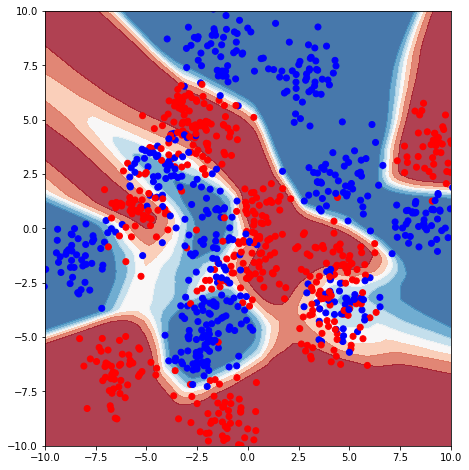

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="relu", learning_rate="invscaling", verbose=True)
clf.fit(X, y)
plot_clf(clf, X, y)